## Importing Libraries

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Get  the Data

In [59]:
df = pd.read_csv('HR_comma_sep.csv')

In [60]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [61]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Converting catagorical features
We'll need to convert categorical features to numerical value. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns = ['Department' , 'salary']

for col in columns :
    df[col] = le.fit_transform(df[col])
    print(le.classes_)

df.head()


['IT' 'RandD' 'accounting' 'hr' 'management' 'marketing' 'product_mng'
 'sales' 'support' 'technical']
['high' 'low' 'medium']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

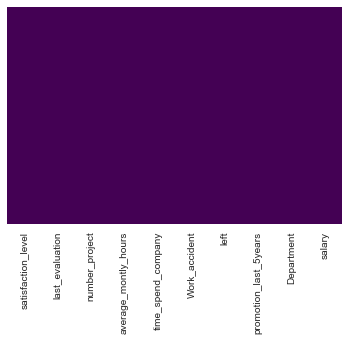

In [64]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap= 'viridis')

From above we can see there is no missing data 

### Let's continue on by visualizing some more of the data!

<AxesSubplot:xlabel='left', ylabel='count'>

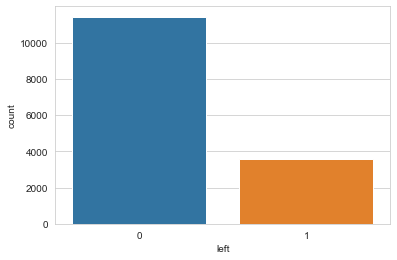

In [72]:
sns.set_style('whitegrid')
sns.countplot(x = 'left',data = df)

we can see only roughly 25% employee left the company

<AxesSubplot:xlabel='left', ylabel='count'>

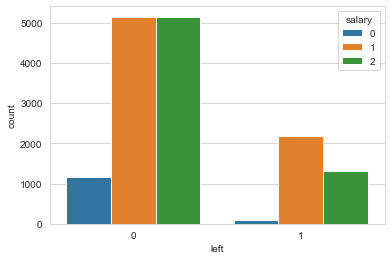

In [82]:
sns.countplot(x = 'left',data = df, hue = 'salary')

From above plot we can see employee with high salary (0) who left the company are very less as compaired to low salary (1) and medium salary (2)

<AxesSubplot:xlabel='satisfaction_level', ylabel='salary'>

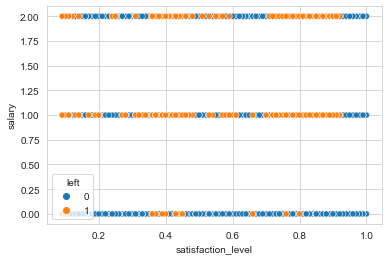

In [88]:
sns.scatterplot(data=df,x= 'satisfaction_level', y= 'salary', hue='left')

<AxesSubplot:xlabel='salary', ylabel='average_montly_hours'>

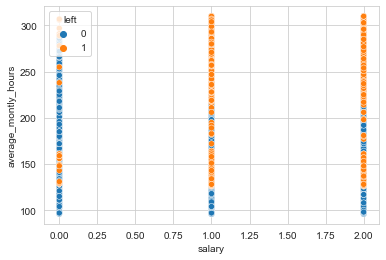

In [92]:
sns.scatterplot(data=df,x= 'salary', y= 'average_montly_hours', hue='left')

Employees with low as well as medium salary and having 200+ working hour are most likely to leave

<AxesSubplot:xlabel='left', ylabel='count'>

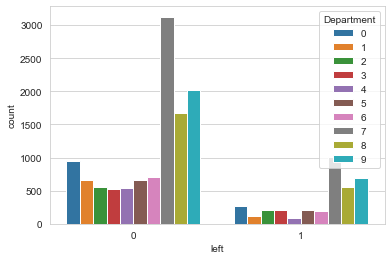

In [83]:
sns.countplot(x = 'left',data = df, hue = 'Department')

sales people are more in number as compaired with other department

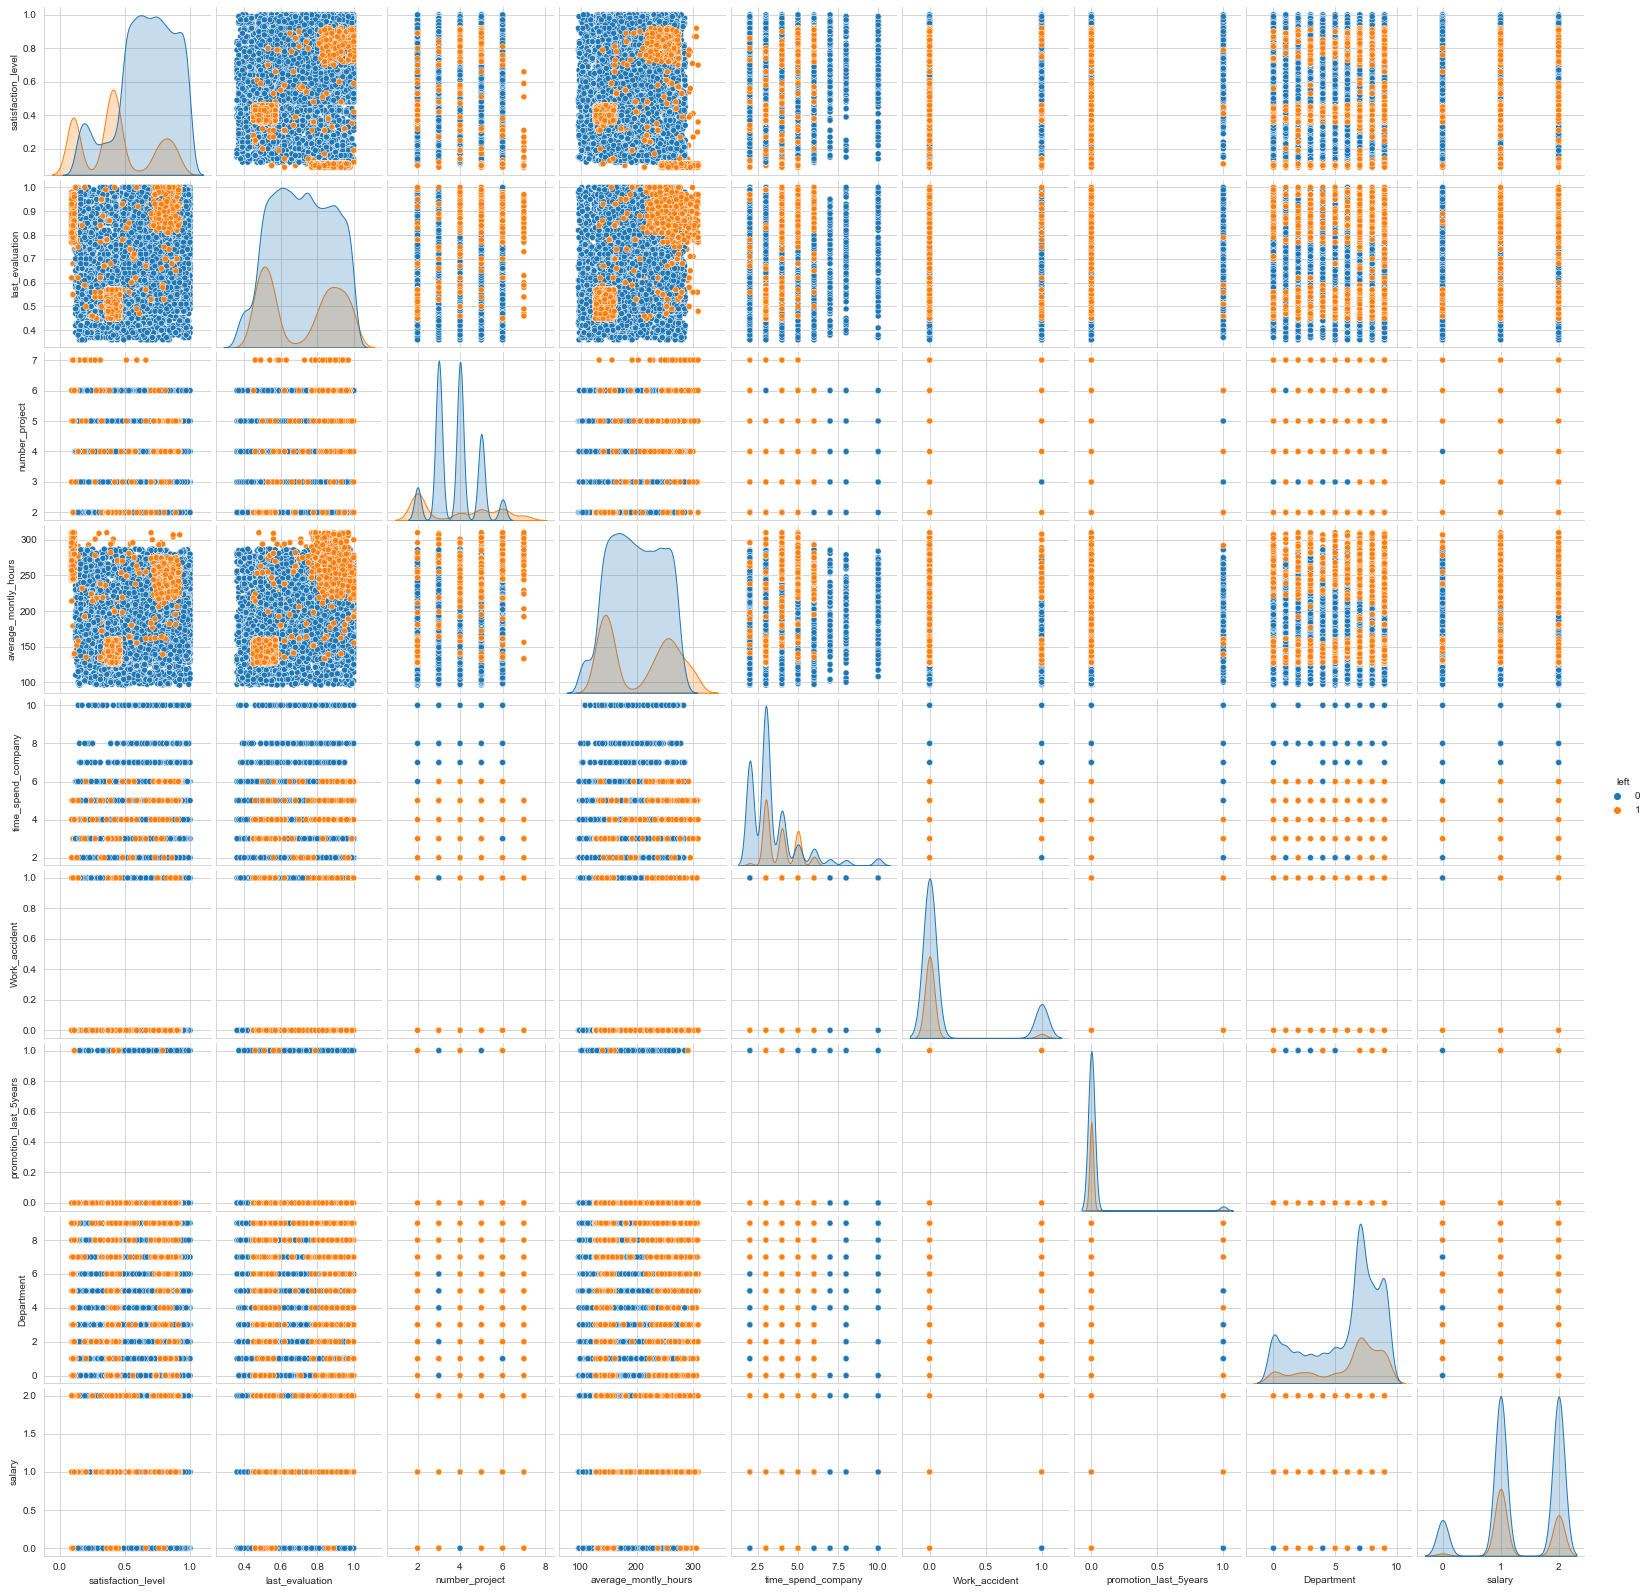

In [26]:
sns.pairplot(data= df , hue= 'left')

<AxesSubplot:xlabel='satisfaction_level', ylabel='promotion_last_5years'>

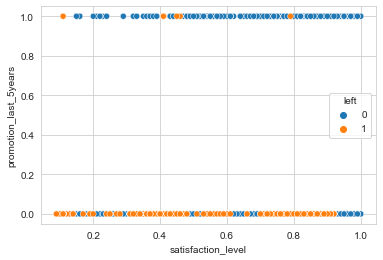

In [71]:
sns.scatterplot(data=df,x= 'satisfaction_level', y= 'promotion_last_5years', hue='left')

we can see whoever didnt had promotion in last 5 year are most likely to leave even if they are a bit satisfied by the job

## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop('left', axis= 1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Training and Processing
Training the various models to get best suited model for our dataset

In [31]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [32]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'K_nearest_Neighbors':{
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors':[5,10, 20, 50, 80, 100]
        }
    }
}       

## Doing Hyperparameter Tuning 
To get the optimum parameters for specific model we are training

In [34]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

,model,best_score,best_params
0,svm,0.961497,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.988082,{'n_estimators': 10}
2,logistic_regression,0.764647,{'C': 1}
3,K_nearest_Neighbors,0.929577,{'n_neighbors': 5}


In [48]:
results = pd.DataFrame(scores,columns=['model','best_score','best_params'])
results

,model,best_score,best_params
0,svm,0.961497,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.988082,{'n_estimators': 10}
2,logistic_regression,0.764647,{'C': 1}
3,K_nearest_Neighbors,0.929577,{'n_neighbors': 5}


#### From above results we can see the Randon Forest Classifier is performing best among other models with accuracy of around 98%

## Prediction and Validation

In [37]:
rfc = RandomForestClassifier(n_estimators= 10)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)

Got the accuracy of 99% on training data

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
y_pred= rfc.predict(X_train)
accuracy_score(y_pred,y_train)

0.9986665555462956

In [46]:
print(accuracy_score(pred,y_test) ,"\n\n", confusion_matrix(pred,y_test), "\n\n", classification_report(pred,y_test))

0.9883333333333333 

 [[2295   31]
 [   4  670]] 

               precision    recall  f1-score   support

           0       1.00      0.99      0.99      2326
           1       0.96      0.99      0.97       674

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000

